In [17]:
#–Load and Plot Raw Price Data
import sys
import os

# 🛠 Add the 'src' directory to Python's module search path
sys.path.append(os.path.abspath("../src"))

from data_loader import load_and_clean_data, plot_price_trend

In [18]:

# Load the dataset
df = load_and_clean_data("../data/BrentOilPrices.csv")


In [19]:
# Display first 5 rows
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [20]:
# Check for missing values
df.isnull().sum()


Date     0
Price    0
dtype: int64

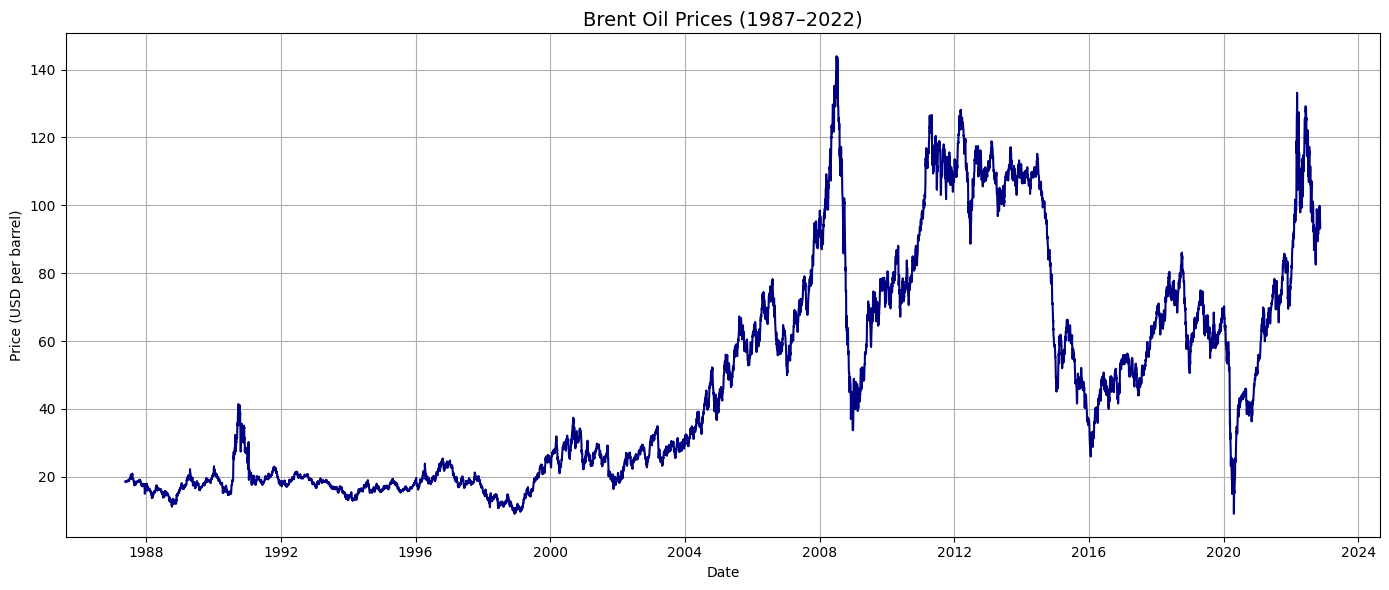

In [21]:
# Plot raw price trend
plot_price_trend(df)


Brent Oil Price Trend (1987–2022)

This time series plot visualizes historical Brent oil prices from 1987 to 2022:

Y-axis: Price of Brent crude oil in USD per barrel.

X-axis: Time, spanning from 1987 to 2022.

Key Observations:
📌 2008 Spike: Prices peaked above $140/barrel during the global financial crisis.

📉 2009 Crash: Sharp decline immediately followed, dropping to ~$40/barrel.

🔼 2011–2014 Plateau: Prices stabilized around $110–$120 before another drop.

⚠️ 2020 Dip: A major dip during the COVID-19 pandemic, briefly approaching $0.

🔁 Post-2020 Recovery: A strong rebound followed, with prices again exceeding $120/barrel in 2022.

Interpretation:
This plot provides a clear view of oil market volatility over 35 years, driven by macroeconomic events, geopolitical tensions, and supply-demand imbalances.

In [22]:
# 📥 Import preprocessing utilities
from preprocessing import compute_log_returns, plot_log_returns, test_stationarity


In [23]:
# 📊 Compute log returns from price series
df = compute_log_returns(df)

# Display with new column
df[['Date', 'Price', 'LogReturn']].head()


,Date,Price,LogReturn
1,1987-05-21,18.45,-0.009709
2,1987-05-22,18.55,0.005405
3,1987-05-25,18.60,0.002692
4,1987-05-26,18.63,0.001612
5,1987-05-27,18.60,-0.001612


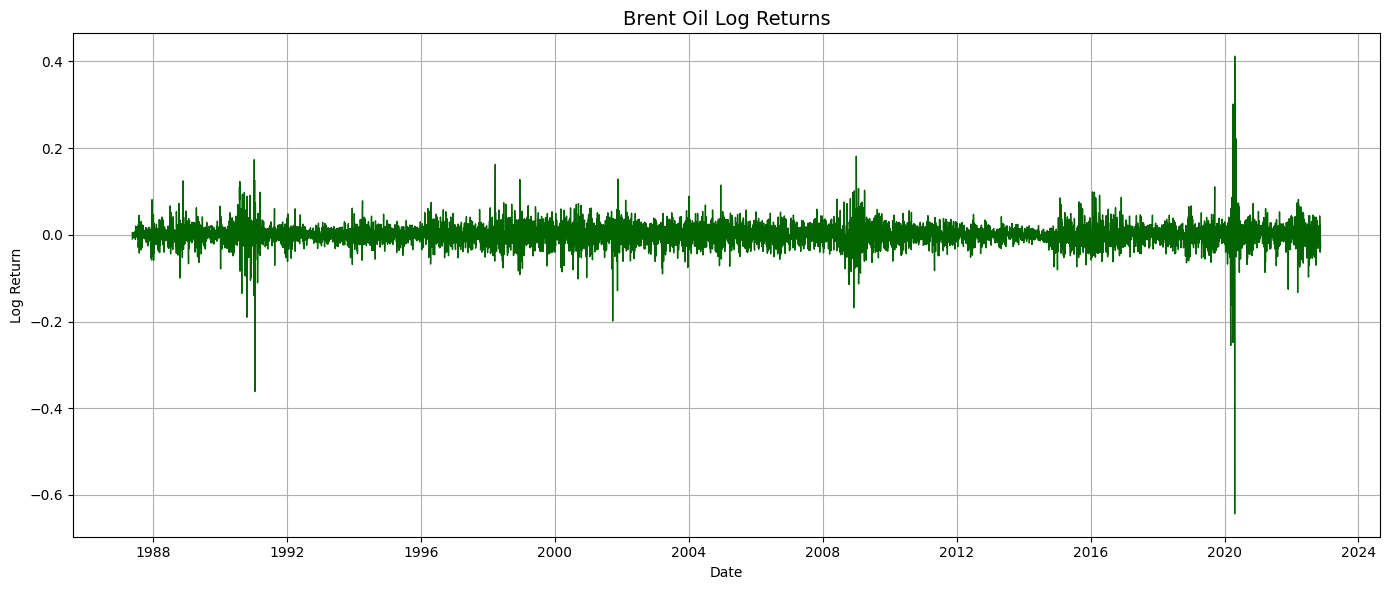

In [24]:
# 📈 Visualize log returns
plot_log_returns(df)


In [25]:
# 📏 Test for stationarity of price and log return
test_stationarity(df['Price'], name="Price")
test_stationarity(df['LogReturn'], name="LogReturn")


ADF Test for Price:
  Test Statistic = -1.9919
  p-value = 0.2902
  Stationary: No

ADF Test for LogReturn:
  Test Statistic = -16.4271
  p-value = 0.0000
  Stationary: Yes



In [26]:
from event_utils import load_event_data, plot_events_on_price


In [27]:
# ✅ Load and rename columns
events_df = load_event_data("../data/key_events.csv")

# 👀 Preview cleaned DataFrame
events_df.head()


,event_name,start_date,end_date,category,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Black Monday (1987),1987-10-19,1987-10-19,Economic Crises,NaN,NaN,NaN,NaN
1,Fall of Berlin Wall (1989),1989-11-09,1989-11-09,Geopolitical Conflicts,NaN,NaN,NaN,NaN
2,Gulf War (1990-1991),1990-08-02,1991-02-28,Geopolitical Conflicts,NaN,NaN,NaN,NaN
3,Asian financial crisis(1997 ),1997-07-01,1999-01-01,Economic Crises,NaN,NaN,NaN,NaN
4,Dot-com Bubble Burst (2000-2002),2000-03-10,2002-10-09,Economic Crises,NaN,NaN,NaN,NaN


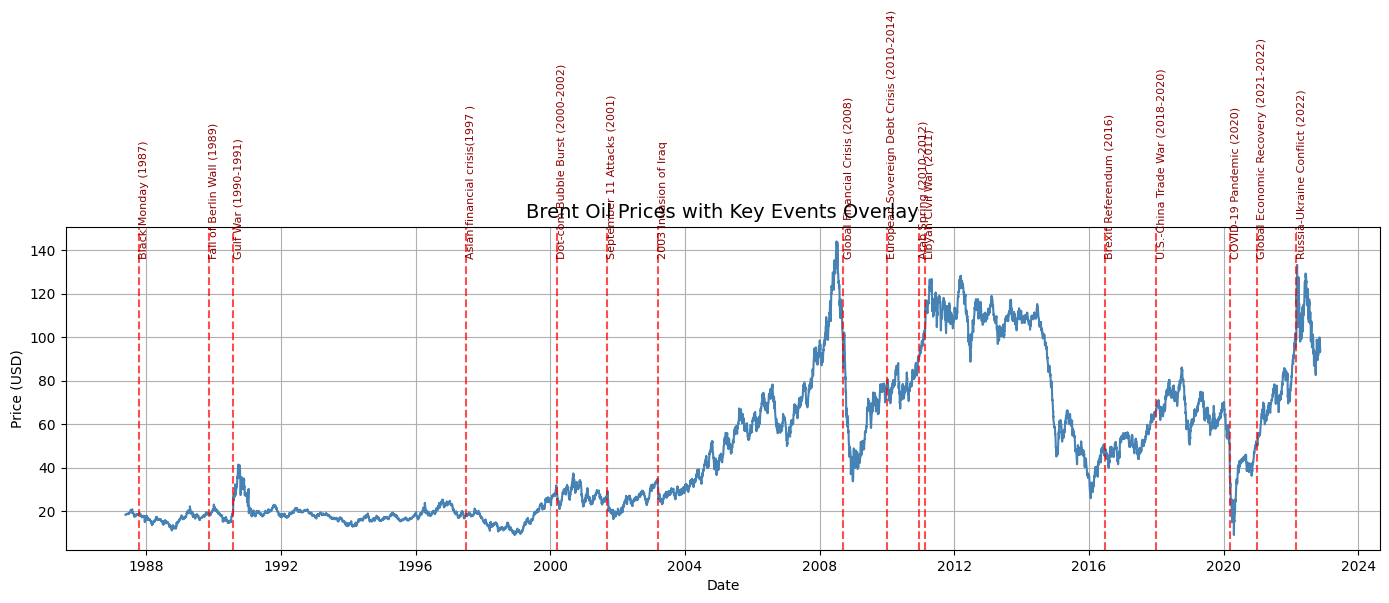

In [34]:
# Only keep events tagged as 'major'
filtered_events_df = events_df[events_df['category'].isin(['Economic Crises','Geopolitical Conflicts'])]
plot_events_on_price(df, filtered_events_df)


Observations & Event Impacts
🔺 Gulf War (1990–1991)
Marked a sharp spike in oil prices due to fears of supply disruption from Iraq and Kuwait — two major oil exporters.

🔻 Asian Financial Crisis (1997)
Correlates with a downward drift, reflecting reduced demand across emerging markets in Asia.

🔻 Dot-com Bubble Burst (2000–2002)
Occurred in a relatively stable price band but contributed to softening demand expectations.

🔻 9/11 Attacks (2001)
Caused short-term volatility; price quickly stabilized, but uncertainty increased.

🔺 2003 Invasion of Iraq
Start of a long upward trend in oil prices, driven by prolonged instability in a key oil-producing region.

🔺 Global Financial Crisis (2008)
Followed an all-time high near $140/barrel → sharp collapse to ~$40, highlighting how economic demand shocks can trigger rapid declines.

🔻 European Debt Crisis (2010–2014)
Sustained downward pressure through mid-2010s, reflecting slower European growth and demand suppression.

🔺 Arab Spring (2010–2012)
Coincides with price volatility, driven by disruptions in Libya and other oil-exporting countries.

🔺 U.S.-China Trade War (2018–2020)
Uncertainty dampened price recovery — visible stagnation and short-term drops.

🔻 COVID-19 Pandemic (2020)
Triggered the most extreme drop — oil prices briefly turned negative in the U.S. and Brent dropped sharply due to demand collapse.

🔺 COVID Recovery (2021–2022)
Followed by a strong rebound in prices, driven by reopening economies and constrained supply.

🔺 Russia–Ukraine Conflict (2022)
Sharp price spike tied to fears of major supply disruptions from Russia, a key global exporter.